In [54]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

link = 'sequential_data/traces/boot_delete/91cd4e1c-e28e-47e6-a76b-725f595577dc.json' #size = 2.8 MB
#link = 'sequential_data/traces/network_create_delete/0d338b53-389d-49d0-ae76-816ca0c46a79.json' #size = 17 KB

with open(link) as f:
  data = json.load(f)

print(json.dumps(data, indent=2))

{
  "info": {
    "started": 0,
    "last_trace_started": 78214,
    "finished": 78257,
    "name": "total"
  },
  "stats": {
    "wsgi": {
      "count": 90,
      "duration": 6643
    },
    "neutron.db": {
      "count": 90,
      "duration": 206
    },
    "neutron_api": {
      "count": 613,
      "duration": 10434
    },
    "db": {
      "count": 155,
      "duration": 351
    },
    "nova_image": {
      "count": 1,
      "duration": 34
    },
    "rpc": {
      "count": 49,
      "duration": 8176
    },
    "compute_api": {
      "count": 43,
      "duration": 2187
    }
  },
  "children": [
    {
      "info": {
        "exception": "None",
        "name": "wsgi",
        "service": "public",
        "started": 0,
        "meta.raw_payload.wsgi-stop": {
          "info": {
            "host": "wally113"
          },
          "name": "wsgi-stop",
          "service": "public",
          "timestamp": "2019-11-19T22:51:43.158254",
          "trace_id": "59f2cf99-61ff-479e-9dec-

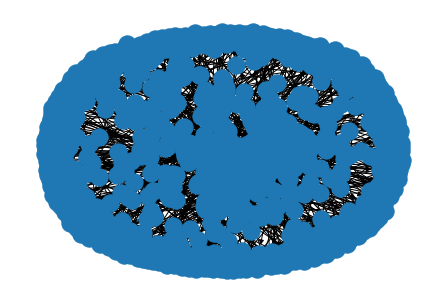

In [55]:
import networkx as nx

trace = nx.DiGraph()

def create_graph(df):
    if len(df['children']) == 0:
        trace.add_edge(df['parent_id'], df['trace_id'])
    else:
        for i in range(len(df['children'])):
            create_graph(df['children'][i])
        if 'trace_id' in df.keys():
            trace.add_edge(df['parent_id'], df['trace_id'])

create_graph(data)

nx.draw(trace, with_labels = False)

In [56]:
trace.number_of_nodes()

1042

In [57]:
trace.number_of_edges()

1041

In [37]:
import pylab as plt
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import pygraphviz as pgv

trace.graph['graph']={'rankdir':'TD'}
trace.graph['node']={'shape':'circle'}
trace.graph['edges']={'arrowsize':'1.0'}
A = to_agraph(trace)
A.layout('dot')
A.draw('a.png')

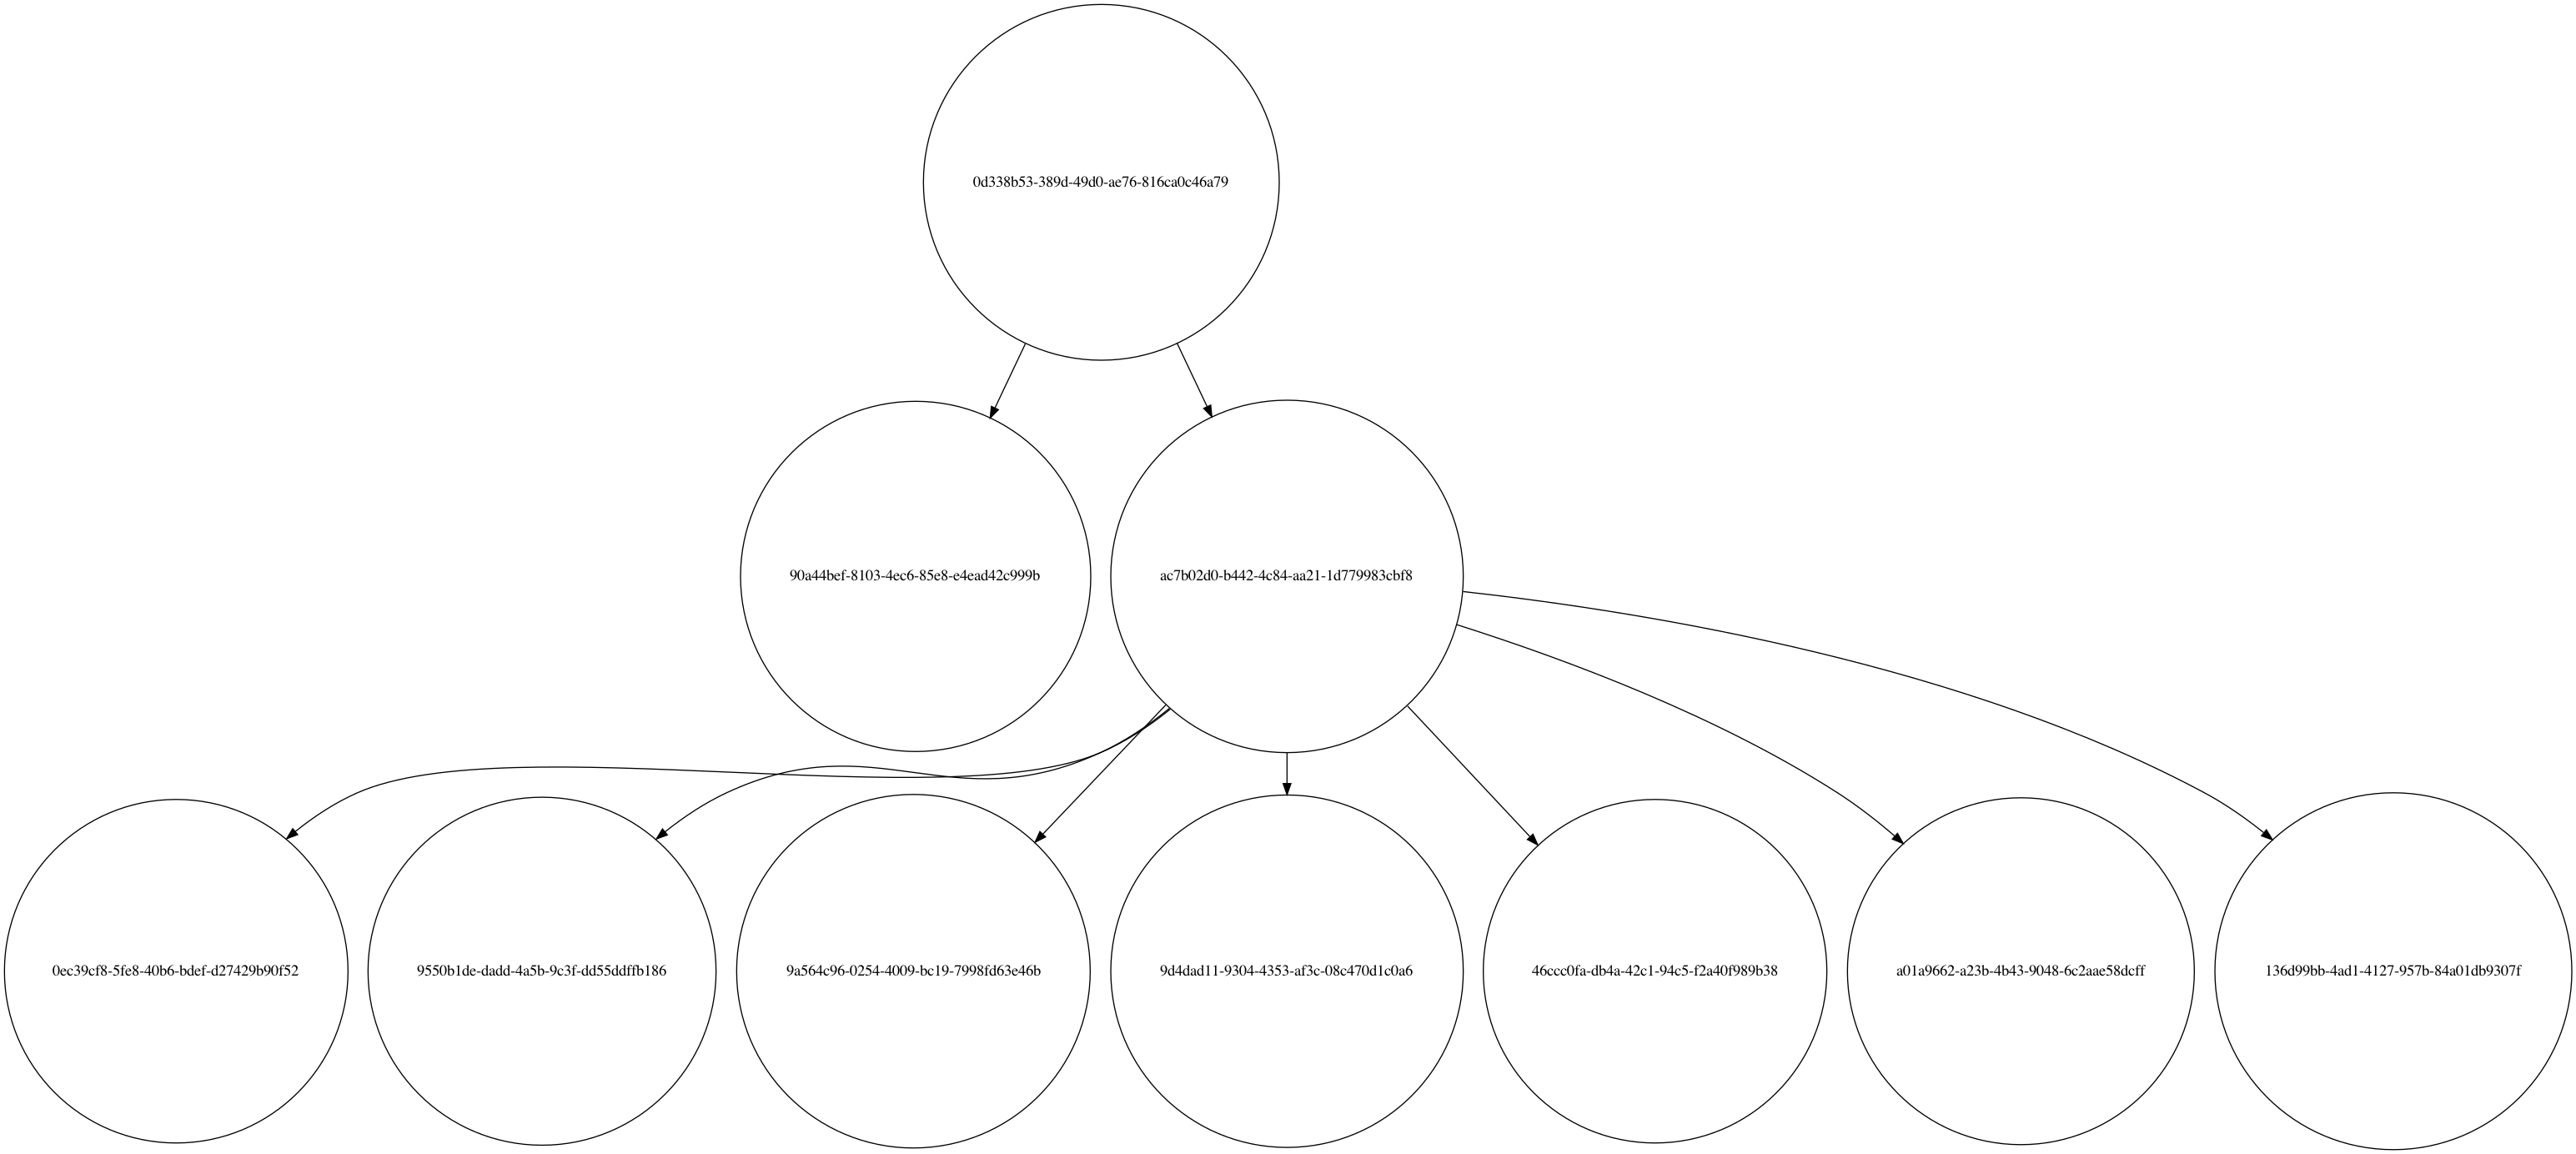

In [38]:
from IPython.display import Image
Image(filename='a.png') 

In [40]:
import os

directories = ['sequential_data/traces/network_create_delete/', 'sequential_data/traces/boot_delete/', 'sequential_data/traces/image_create_delete/']

def create_graph_from_directory(directory):
    files = os.listdir(directory)
    files = list(map(lambda x: directory + x, files))
    for file in files:
        with open(file) as f:
            data = json.load(f)
        create_graph(data)
        
for directory in directories:
    trace = nx.DiGraph()
    create_graph_from_directory(directory)
    print('number of nodes in directory', directory, '=', trace.number_of_nodes())    
    print('number of edges in directory', directory, '=', trace.number_of_edges(), '\n')

number of nodes in directory sequential_data/traces/network_create_delete/ = 145969
number of edges in directory sequential_data/traces/network_create_delete/ = 144969 

number of nodes in directory sequential_data/traces/boot_delete/ = 592586
number of edges in directory sequential_data/traces/boot_delete/ = 591836 

number of nodes in directory sequential_data/traces/image_create_delete/ = 93757
number of edges in directory sequential_data/traces/image_create_delete/ = 92757 

